In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("manufacturing_defect_dataset.csv")

In [5]:
df.head()

,ProductionVolume,ProductionCost,SupplierQuality,DeliveryDelay,DefectRate,QualityScore,MaintenanceHours,DowntimePercentage,InventoryTurnover,StockoutRate,WorkerProductivity,SafetyIncidents,EnergyConsumption,EnergyEfficiency,AdditiveProcessTime,AdditiveMaterialCost,DefectStatus
0,202,13175.403783,86.648534,1,3.121492,63.463494,9,0.052343,8.630515,0.081322,85.042379,0,2419.616785,0.468947,5.551639,236.439301,1
1,535,19770.046093,86.310664,4,0.819531,83.697818,20,4.908328,9.296598,0.038486,99.657443,7,3915.566713,0.119485,9.080754,353.957631,1
2,960,19060.820997,82.132472,0,4.514504,90.350550,1,2.464923,5.097486,0.002887,92.819264,2,3392.385362,0.496392,6.562827,396.189402,1
3,370,5647.606037,87.335966,5,0.638524,67.628690,8,4.692476,3.577616,0.055331,96.887013,8,4652.400275,0.183125,8.097496,164.135870,1
4,206,7472.222236,81.989893,3,3.867784,82.728334,9,2.746726,6.851709,0.068047,88.315554,7,1581.630332,0.263507,6.406154,365.708964,1


In [6]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3240 entries, 0 to 3239
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ProductionVolume      3240 non-null   int64  
 1   ProductionCost        3240 non-null   float64
 2   SupplierQuality       3240 non-null   float64
 3   DeliveryDelay         3240 non-null   int64  
 4   DefectRate            3240 non-null   float64
 5   QualityScore          3240 non-null   float64
 6   MaintenanceHours      3240 non-null   int64  
 7   DowntimePercentage    3240 non-null   float64
 8   InventoryTurnover     3240 non-null   float64
 9   StockoutRate          3240 non-null   float64
 10  WorkerProductivity    3240 non-null   float64
 11  SafetyIncidents       3240 non-null   int64  
 12  EnergyConsumption     3240 non-null   float64
 13  EnergyEfficiency      3240 non-null   float64
 14  AdditiveProcessTime   3240 non-null   float64
 15  AdditiveMaterialCost 

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X =  df.drop("DefectStatus", axis = 1)
y = df["DefectStatus"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [10]:
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


X_train: (2592, 16)
X_test: (648, 16)
y_train: (2592,)
y_test: (648,)


In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter = 1000, random_state = 43)
logreg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=43)

In [13]:
y_pred = logreg.predict(X_test_scaled)

In [14]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy :", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy : 0.8765432098765432

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.38      0.49       103
           1       0.89      0.97      0.93       545

    accuracy                           0.88       648
   macro avg       0.80      0.67      0.71       648
weighted avg       0.86      0.88      0.86       648


Confusion Matrix:
 [[ 39  64]
 [ 16 529]]


In [15]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [16]:
y_pred_dt = dtree.predict(X_test)

In [17]:
print("Accuracy :", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

Accuracy : 0.8996913580246914

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.70      0.69       103
           1       0.94      0.94      0.94       545

    accuracy                           0.90       648
   macro avg       0.81      0.82      0.81       648
weighted avg       0.90      0.90      0.90       648


Confusion Matrix:
 [[ 72  31]
 [ 34 511]]


In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
rf = RandomForestClassifier(n_estimators = 100 , random_state = 42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [20]:
y_pred_rf = rf.predict(X_test)

In [21]:
print("Accuracy :", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Accuracy : 0.9506172839506173

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.73      0.82       103
           1       0.95      0.99      0.97       545

    accuracy                           0.95       648
   macro avg       0.95      0.86      0.90       648
weighted avg       0.95      0.95      0.95       648


Confusion Matrix:
 [[ 75  28]
 [  4 541]]


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns


In [23]:
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest']
accuracies = [0.8765, 0.8997, 0.9506]
f1_scores_class0 = [0.49, 0.69, 0.82]
f1_scores_class1 = [0.93, 0.94, 0.97]

In [24]:
cm_logreg = confusion_matrix(y_test, y_pred)       
cm_dtree = confusion_matrix(y_test, y_pred_dt)     
cm_rf = confusion_matrix(y_test, y_pred_rf)  

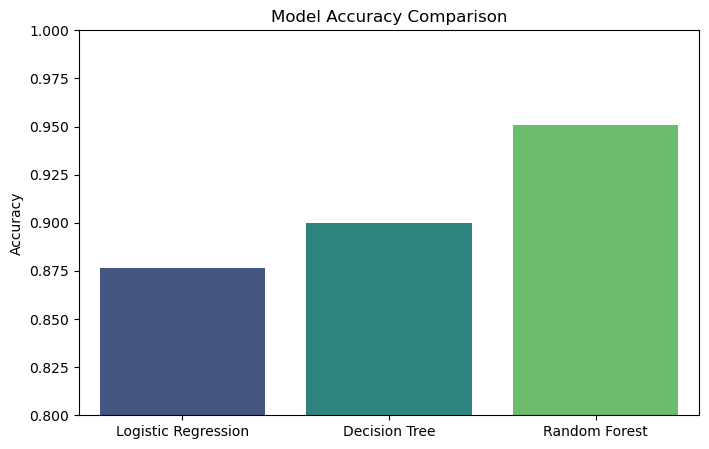

In [25]:
plt.figure(figsize=(8, 5))
sns.barplot(x=model_names, y=accuracies, hue=model_names, palette='viridis', dodge=False, legend=False)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1.0)
plt.savefig('figure1_accuracy_comparison.png', dpi = 300, bbox_inches = 'tight' )
plt.show()


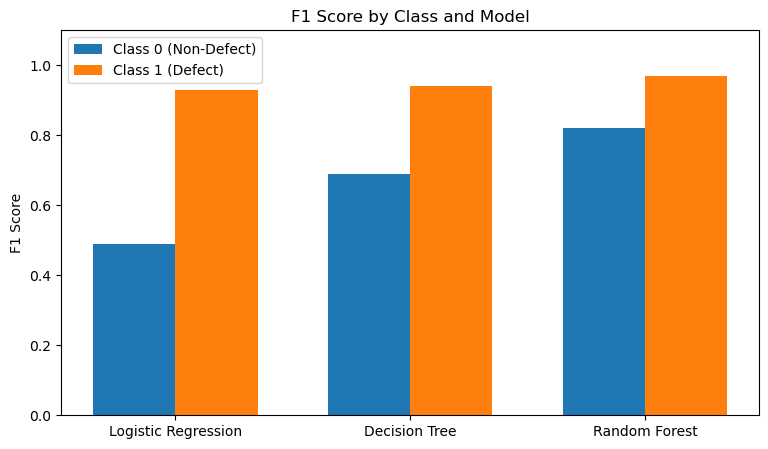

In [26]:
import numpy as np

x = np.arange(len(model_names))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(9, 5))
rects1 = ax.bar(x - width/2, f1_scores_class0, width, label='Class 0 (Non-Defect)')
rects2 = ax.bar(x + width/2, f1_scores_class1, width, label='Class 1 (Defect)')

# Labels and titles
ax.set_ylabel('F1 Score')
ax.set_title('F1 Score by Class and Model')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.set_ylim(0, 1.1)
ax.legend()
plt.savefig('figure2_f1_scores.png', dpi = 300, bbox_inches = 'tight' )
plt.show()

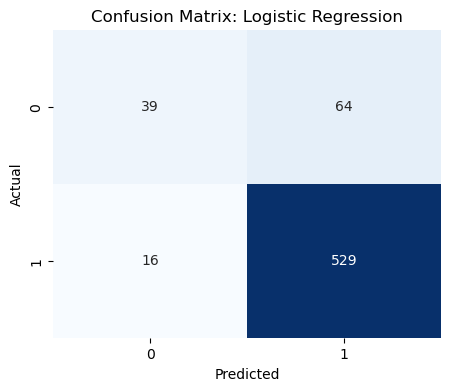

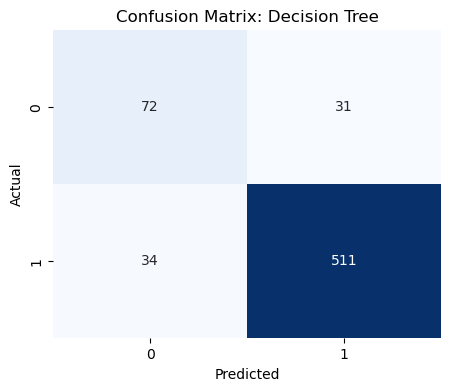

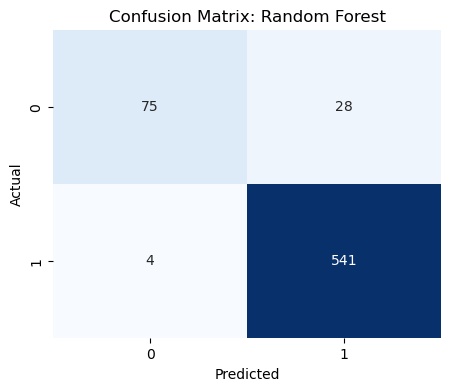

In [27]:
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.savefig("title.png", dpi = 300, bbox_inches = 'tight' )
    plt.show()

plot_confusion_matrix(cm_logreg, "Confusion Matrix: Logistic Regression")
plot_confusion_matrix(cm_dtree, "Confusion Matrix: Decision Tree")
plot_confusion_matrix(cm_rf, "Confusion Matrix: Random Forest")

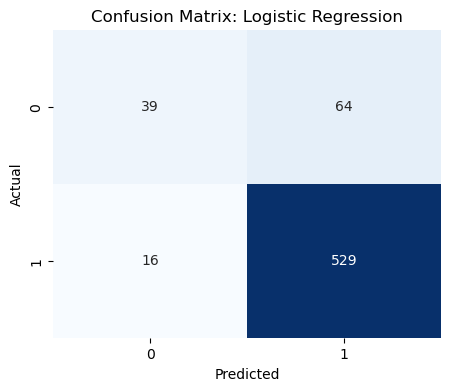

In [28]:

plot_confusion_matrix(cm_logreg, "Confusion Matrix: Logistic Regression")

In [29]:
import numpy as np

In [33]:
importances = rf.feature_importances_
importances


array([0.10276236, 0.02482314, 0.02609487, 0.00955121, 0.2185895 ,
       0.1501372 , 0.23334362, 0.02614143, 0.02620901, 0.03130258,
       0.0264806 , 0.01030886, 0.02722405, 0.03104863, 0.02295452,
       0.03302845])

In [39]:
indices = np.argsort(importances)[::-1]
indices

array([ 6,  4,  5,  0, 15,  9, 13, 12, 10,  8,  7,  2,  1, 14, 11,  3],
      dtype=int64)

In [37]:
feature_names = X_train .columns
feature_names

Index(['ProductionVolume', 'ProductionCost', 'SupplierQuality',
       'DeliveryDelay', 'DefectRate', 'QualityScore', 'MaintenanceHours',
       'DowntimePercentage', 'InventoryTurnover', 'StockoutRate',
       'WorkerProductivity', 'SafetyIncidents', 'EnergyConsumption',
       'EnergyEfficiency', 'AdditiveProcessTime', 'AdditiveMaterialCost'],
      dtype='object')

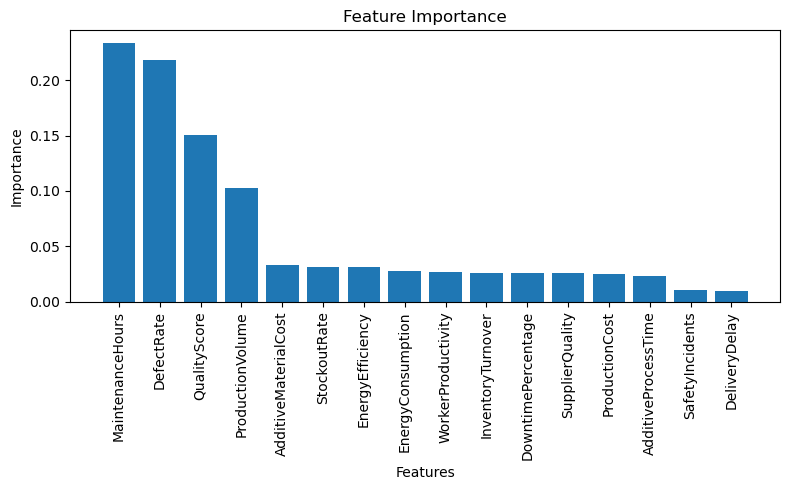

In [45]:
plt.figure(figsize = (8,5))
plt.title("Feature Importance")
plt.bar(range(len(importances)), importances[indices] )
plt.xticks(
    range(len(importances)),
    feature_names[indices],
    rotation = 90
)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.savefig("figure6_feature_importance.png", dpi=300, bbox_inches="tight")


([<matplotlib.axis.XTick at 0x1f36c2e67b0>,
 [Text(0, 0, 'MaintenanceHours'),
  Text(1, 0, 'DefectRate'),
  Text(2, 0, 'QualityScore'),
  Text(3, 0, 'ProductionVolume'),
  Text(4, 0, 'AdditiveMaterialCost'),
  Text(5, 0, 'StockoutRate'),
  Text(6, 0, 'EnergyEfficiency'),
  Text(7, 0, 'EnergyConsumption'),
  Text(8, 0, 'WorkerProductivity'),
  Text(9, 0, 'InventoryTurnover'),
  Text(10, 0, 'DowntimePercentage'),
  Text(11, 0, 'SupplierQuality'),
  Text(12, 0, 'ProductionCost'),
  Text(13, 0, 'AdditiveProcessTime'),
  Text(14, 0, 'SafetyIncidents'),
  Text(15, 0, 'DeliveryDelay')])

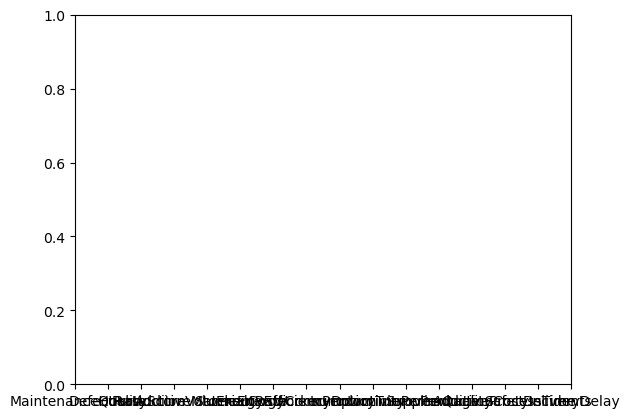